In [ ]:
!pip install pandas
!pip install pandas-profiling
!pip install openpyxl

In [18]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [41]:
descriptions = pd.read_excel("technical_case.xlsx")

In [42]:
descriptions

Columns                                         Definition
0                  Month                                   Month considered
1             Website ID                                  ID of the website
2               Vertical                            Vertical of the website
3                Country                        Country code of the visitor
4                 Device                     Device used during the session
5               Sessions                           Total number of sessions
6           New sessions                           First visit of a visitor
7        Bounce sessions  when a visitor only sees 1 page then leaves th...
8        Buying sessions              when a session ends with a conversion
9              Pageviews           number of pages seen across all sessions
10  Total time spent sec           number of time spent across all sessions
11                   NaN                                                NaN
12          Useful ratio                   CVR = Buying Sessions / Sessions
13             Countries  US, CA, MX, GB, NL, SE, IE, DK,FR, IT, ES, BE,...
14               Devices                            Mobile, Desktop, Tablet
15             Verticals  consumer_equipment , cosmetics, luxury, travel...

In [23]:
df = pd.read_excel("technical_case.xlsx", sheet_name="Data")

In [60]:
df.head()

Month     Website            Vertical                     Sub Vertical  \
0 2021-01-01  98761252.0  consumer_equipment  home_decor,office_supplies,tech   
1 2021-01-01  98761252.0  consumer_equipment  home_decor,office_supplies,tech   
2 2021-01-01  98761252.0  consumer_equipment  home_decor,office_supplies,tech   
3 2021-01-01  98761252.0  consumer_equipment  home_decor,office_supplies,tech   
4 2021-01-01  98761252.0  consumer_equipment  home_decor,office_supplies,tech   

  Country   Device  Sessions  New sessions  Bounce sessions  Buying sessions  \
0      AT  Desktop     558.0         399.0            298.0              5.0   
1      BE  Desktop   26715.0       17384.0          13827.0            124.0   
2      CA  Desktop   11466.0        9204.0           6814.0             46.0   
3      CH  Desktop   14941.0        9941.0           7063.0            159.0   
4      DE  Desktop    7102.0        4563.0           3423.0            111.0   

   Pageviews  Total time spent sec  
0     1756.0             134718.87  
1    96066.0            4703873.09  
2    26009.0            1404816.43  
3    66484.0            3392322.47  
4    29167.0            1722841.13

In [24]:
profile = ProfileReport(df, title="Technical Case Profiling Report", explorative=True)

In [25]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
df

Month     Website            Vertical  \
0      2021-01-01  98761252.0  consumer_equipment   
1      2021-01-01  98761252.0  consumer_equipment   
2      2021-01-01  98761252.0  consumer_equipment   
3      2021-01-01  98761252.0  consumer_equipment   
4      2021-01-01  98761252.0  consumer_equipment   
...           ...         ...                 ...   
259532 2021-06-01  98766809.0             fashion   
259533 2021-06-01  98766809.0             fashion   
259534 2021-06-01  98766809.0             fashion   
259535 2021-06-01  98766809.0             fashion   
259536 2021-06-01  98766809.0             fashion   

                           Sub Vertical Country   Device  Sessions  \
0       home_decor,office_supplies,tech      AT  Desktop     558.0   
1       home_decor,office_supplies,tech      BE  Desktop   26715.0   
2       home_decor,office_supplies,tech      CA  Desktop   11466.0   
3       home_decor,office_supplies,tech      CH  Desktop   14941.0   
4       home_decor,office_supplies,tech      DE  Desktop    7102.0   
...                                 ...     ...      ...       ...   
259532                         footwear      BE   Tablet       3.0   
259533                         footwear      CA   Tablet       2.0   
259534                         footwear      DE   Tablet       3.0   
259535                         footwear      FR   Tablet     334.0   
259536                         footwear      IE   Tablet       1.0   

        New sessions  Bounce sessions  Buying sessions  Pageviews  \
0              399.0            298.0              5.0     1756.0   
1            17384.0          13827.0            124.0    96066.0   
2             9204.0           6814.0             46.0    26009.0   
3             9941.0           7063.0            159.0    66484.0   
4             4563.0           3423.0            111.0    29167.0   
...              ...              ...              ...        ...   
259532           3.0              1.0              0.0        9.0   
259533           2.0              0.0              0.0       17.0   
259534           1.0              3.0              0.0        3.0   
259535         300.0             74.0              0.0     3224.0   
259536           1.0              0.0              0.0        5.0   

        Total time spent sec  
0                  134718.87  
1                 4703873.09  
2                 1404816.43  
3                 3392322.47  
4                 1722841.13  
...                      ...  
259532                411.46  
259533               1150.60  
259534                  7.63  
259535             104178.09  
259536                467.45  

[259537 rows x 12 columns]

In [89]:
df["CVR"] = df["Buying sessions"] / df["Sessions"]
df["BR"] = df["Bounce sessions"] / df["Sessions"]
df["NR"] = df["New sessions"] / df["Sessions"]

In [108]:
df_group_device = df[["Device", "CVR", "BR", "NR"]].groupby(by="Device")

array([<AxesSubplot:ylabel='CVR'>, <AxesSubplot:ylabel='BR'>,
       <AxesSubplot:ylabel='NR'>], dtype=object)

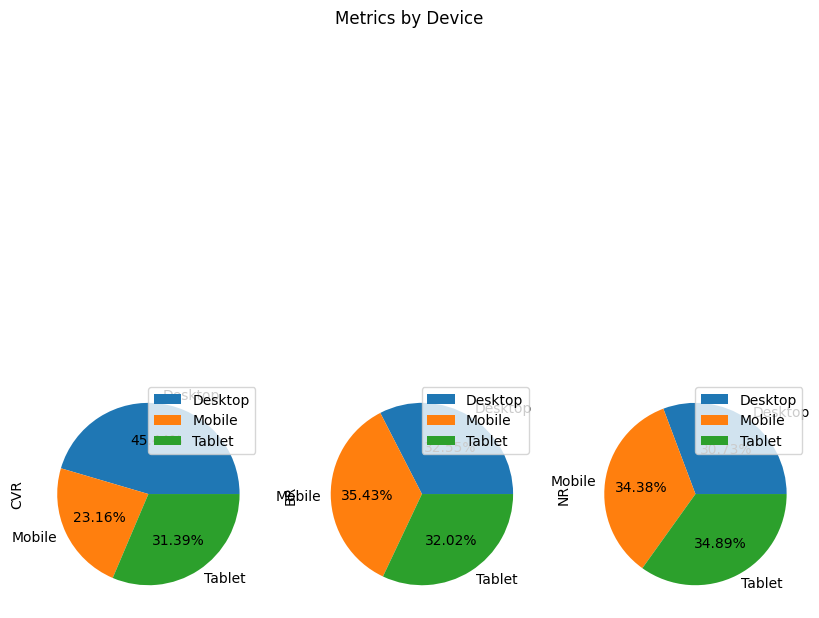

In [109]:
df_group_device.mean().plot.pie(title="Metrics by Device", autopct='%1.2f%%', subplots=True, figsize=(10,10))

# Timeseries

In [128]:
df_sessions_over_time = df[["Month", "Sessions", "New sessions", "Bounce sessions", "Buying sessions"]].groupby(by="Month")

<AxesSubplot:xlabel='Month'>

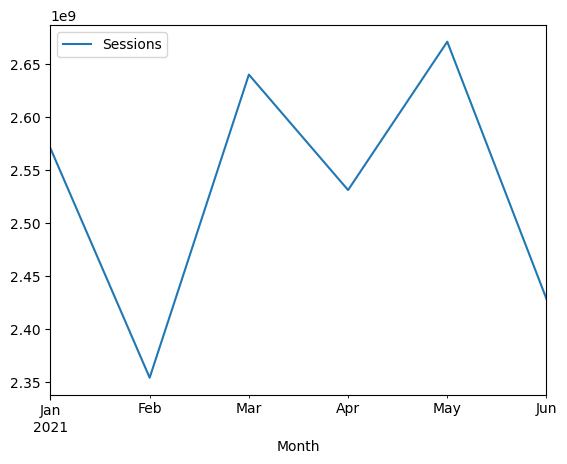

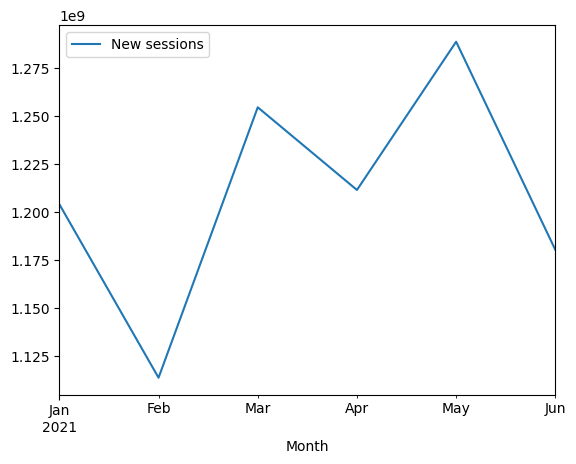

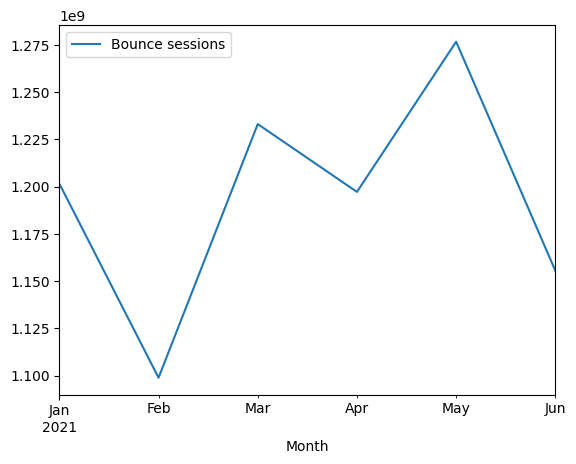

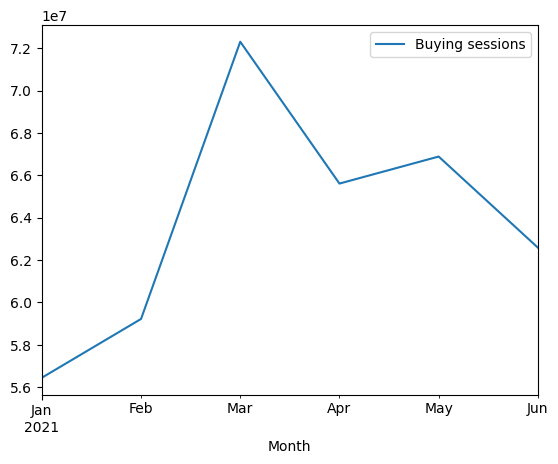

In [138]:
df_sessions_over_time.sum().reset_index().plot.line(x="Month", y="Sessions")
df_sessions_over_time.sum().reset_index().plot.line(x="Month", y="New sessions")
df_sessions_over_time.sum().reset_index().plot.line(x="Month", y="Bounce sessions")
df_sessions_over_time.sum().reset_index().plot.line(x="Month", y="Buying sessions")